In [1]:
from astropy import units as u
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [ ]:
Gaia.login(user="lchatur")

INFO: Login to gaia TAP server [astroquery.gaia.core]


In [4]:
dist_lim_pc = 50.0 * u.parsec
query = f"SELECT source_id, ra, dec, parallax, distance_gspphot, teff_gspphot, azero_gspphot, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, bp_rp, radial_velocity \
FROM gaiadr3.gaia_source \
WHERE parallax >= {30}\
AND ruwe <1.4"

job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')

#results['distance_lightyear'] = results['distance_gspphot'].to(u.lightyear)
#results['radial_velocity_ms'] = results['radial_velocity'].to(u.meter/u.second)
results

INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 9402


source_id,ra,dec,parallax,distance_gspphot,teff_gspphot,azero_gspphot,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,radial_velocity
,deg,deg,mas,pc,K,mag,mag,mag,mag,mag,km / s
int64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
2560907411683036672,27.3567560848055,4.226352856410329,30.000243610691687,32.9775,3006.6848,0.001,15.498599,17.477419,14.189111,3.2883081,14.095306
762411090801347584,165.60455480939743,35.41602477317566,30.000306578467352,33.0782,3162.401,0.0002,13.57612,15.237907,12.337328,2.9005795,6.515214
4619083227718289664,51.3163607558534,-81.98814650564185,30.000639328801153,--,--,--,17.488352,20.797749,15.972154,4.825595,--
402884704215426560,13.425540810367593,49.71409453884813,30.001131352229127,--,--,--,16.89368,19.729616,15.436332,4.2932844,--
5790182751914903424,212.6706728371364,-75.17557455747244,30.005025888207147,--,--,--,17.395609,17.887346,16.759964,1.1273823,--
2869936905701172352,349.9965769922254,28.867406029541456,30.00678392499836,--,--,--,8.620193,9.050894,8.015357,1.0355368,-47.99112
...,...,...,...,...,...,...,...,...,...,...,...
1926461164913660160,355.4800152581559,44.170375700747755,316.48118678226916,--,--,--,10.379277,12.546428,9.017014,3.5294142,-77.289825


In [5]:
color = results['bp_rp'] 
## Bp (blue) - Rp (red) represents the temperature within the HR diagram
#color = np.array(color)
mag = results['phot_g_mean_mag'] + 5. * np.log10(results['parallax']/1000.)
## we need to make sure the magnitude is small in order to attain max brightness
## divide by 10 bc 10 parsecs
## blue (hot) and red/white (dim)
color = np.array(color)
mag = np.array(mag)

<IPython.core.display.Javascript object>


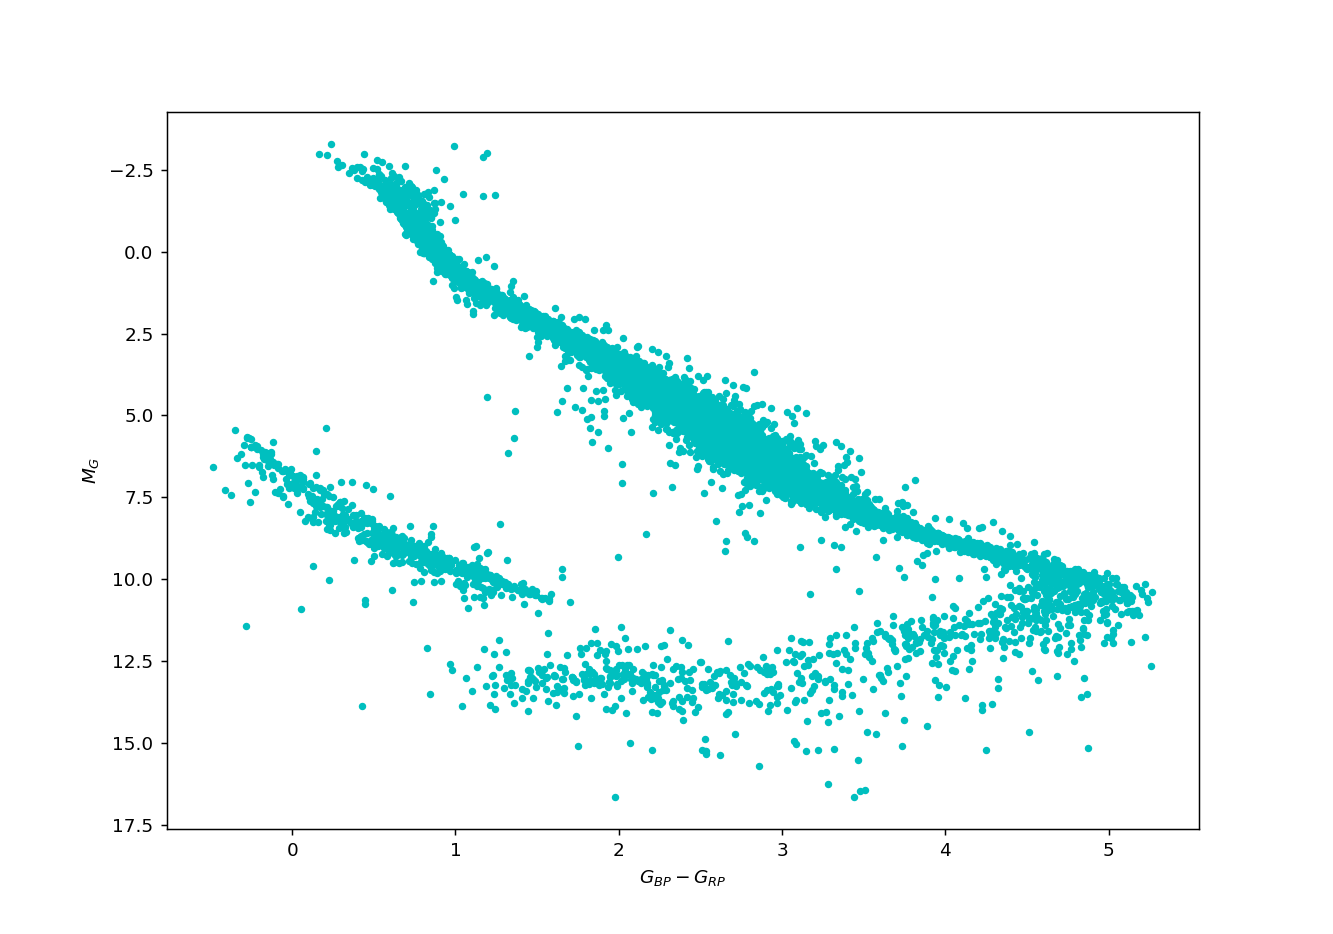

In [6]:
## plot of main sequence 
fig = plt.figure(1,figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(color,mag,'.',color ="c")
#ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_G$');

In [7]:
##filter_color = color.all() > -0.5 and color.all() < 1.7 
##filter_color= np.array(filter_color)
##new_filter_color = color[filter_color]
filter_mag = [] 

for ele in mag:
    if ele < 12.8 and ele > 4.5:
        filter_mag.append(ele)
        
filter_color = []
for ele in color:
    if ele > -0.5 and ele < 1.7:
        filter_color.append(ele)
filter_color = np.array(filter_color)

##print(new_filter_color)
##print(filter_mag)
filter_mag = np.array(filter_mag)
print(filter_mag)

[7.88422296 5.96174884 9.87400437 ... 9.12957018 6.88381561 8.41174307]


In [8]:
filter_color = []
filter_mag = []
for x, y in zip(color, mag):
    if x> -0.5 and x < 1.7 and y < 12.8 and y > 4.5:
        filter_color.append(x)
        filter_mag.append(y)
        
filter_color = np.array (filter_color)
filter_mag = np. array(filter_mag)
print(filter_color.shape)
print(filter_mag.shape)

(621,)
(621,)


<IPython.core.display.Javascript object>


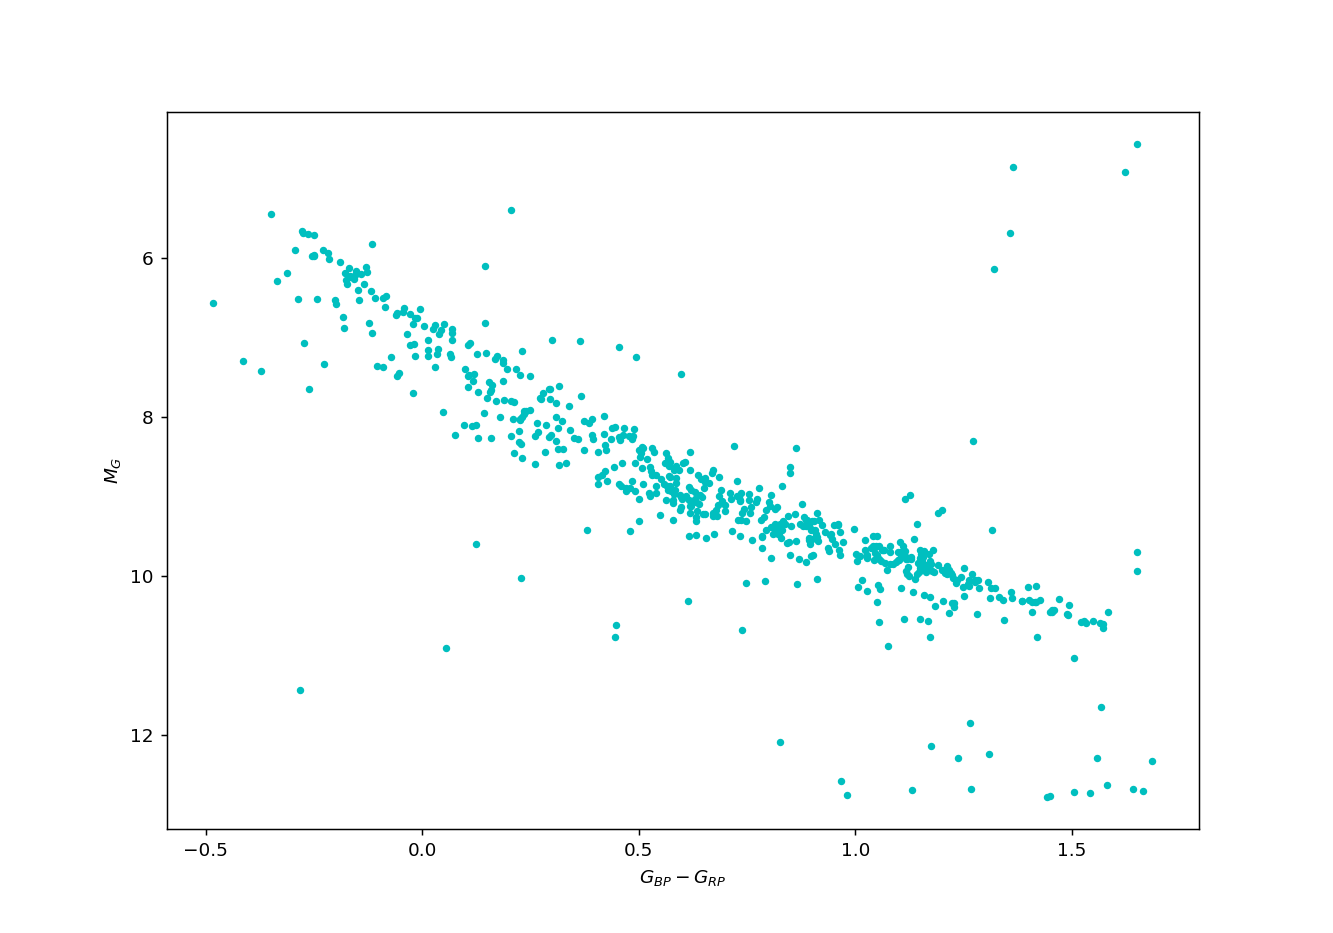

In [9]:
## plot of main sequence 
fig2 = plt.figure(2,figsize=(10,7))
ax2 = fig2.add_subplot(111)
ax2.plot(filter_color,filter_mag,'.',color ="c")
#ax.invert_xaxis()
ax2.invert_yaxis()
ax2.set_xlabel('$G_{BP} - G_{RP}$')
ax2.set_ylabel('$M_G$');

<IPython.core.display.Javascript object>


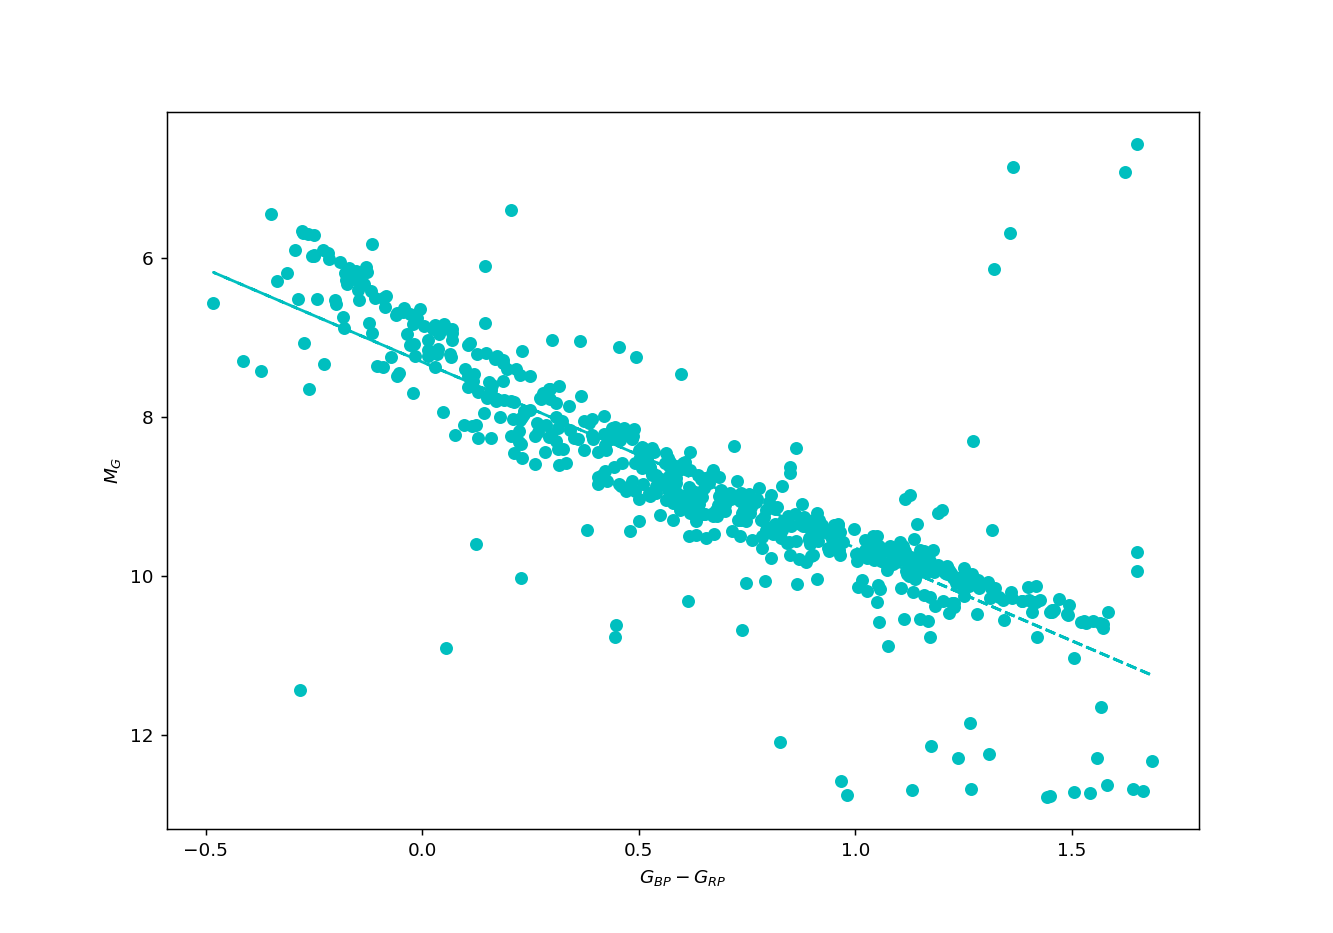

2.3386900532938175 7.304220914008978


/var/folders/49/3nd_n851703bty_2dj98470h0000gn/T/ipykernel_64410/652435341.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(filter_color,filter_mag, 'bo', filter_color, poly1d_fn(filter_color), '--k', color = "c")
/var/folders/49/3nd_n851703bty_2dj98470h0000gn/T/ipykernel_64410/652435341.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(filter_color,filter_mag, 'bo', filter_color, poly1d_fn(filter_color), '--k', color = "c")


10.578386988620322

In [13]:



## plot of main sequence 
fig3 = plt.figure(3,figsize=(10,7))
ax3 = fig3.add_subplot(111)
ax3.plot(filter_color,filter_mag,'.',color ="c")
#ax.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel('$G_{BP} - G_{RP}$')
ax3.set_ylabel('$M_G$');


coef = np.polyfit(filter_color, filter_mag,1)
poly1d_fn = np.poly1d(coef)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(filter_color,filter_mag, 'bo', filter_color, poly1d_fn(filter_color), '--k', color = "c")
#--k' =black dashed line, 'y0' =yellow circle marker

m,b = np.polyfit(filter_color,filter_mag,1)
print(m,b)
poly1d_fn(1.4)

In [11]:
white_dwarfs_color = []
white_dwarfs_mag = []
for x,y in zip (filter_color, filter_mag):
    if abs(poly1d_fn(x)-y) < 0.8:
        white_dwarfs_color.append(x)
        white_dwarfs_mag.append(y)
white_dwarfs_color = np.array(white_dwarfs_color)
white_dwarfs_mag= np.array(white_dwarfs_mag)

print(white_dwarfs_color.shape)
white_dwarfs_mag.shape

(552,)


(552,)

<IPython.core.display.Javascript object>


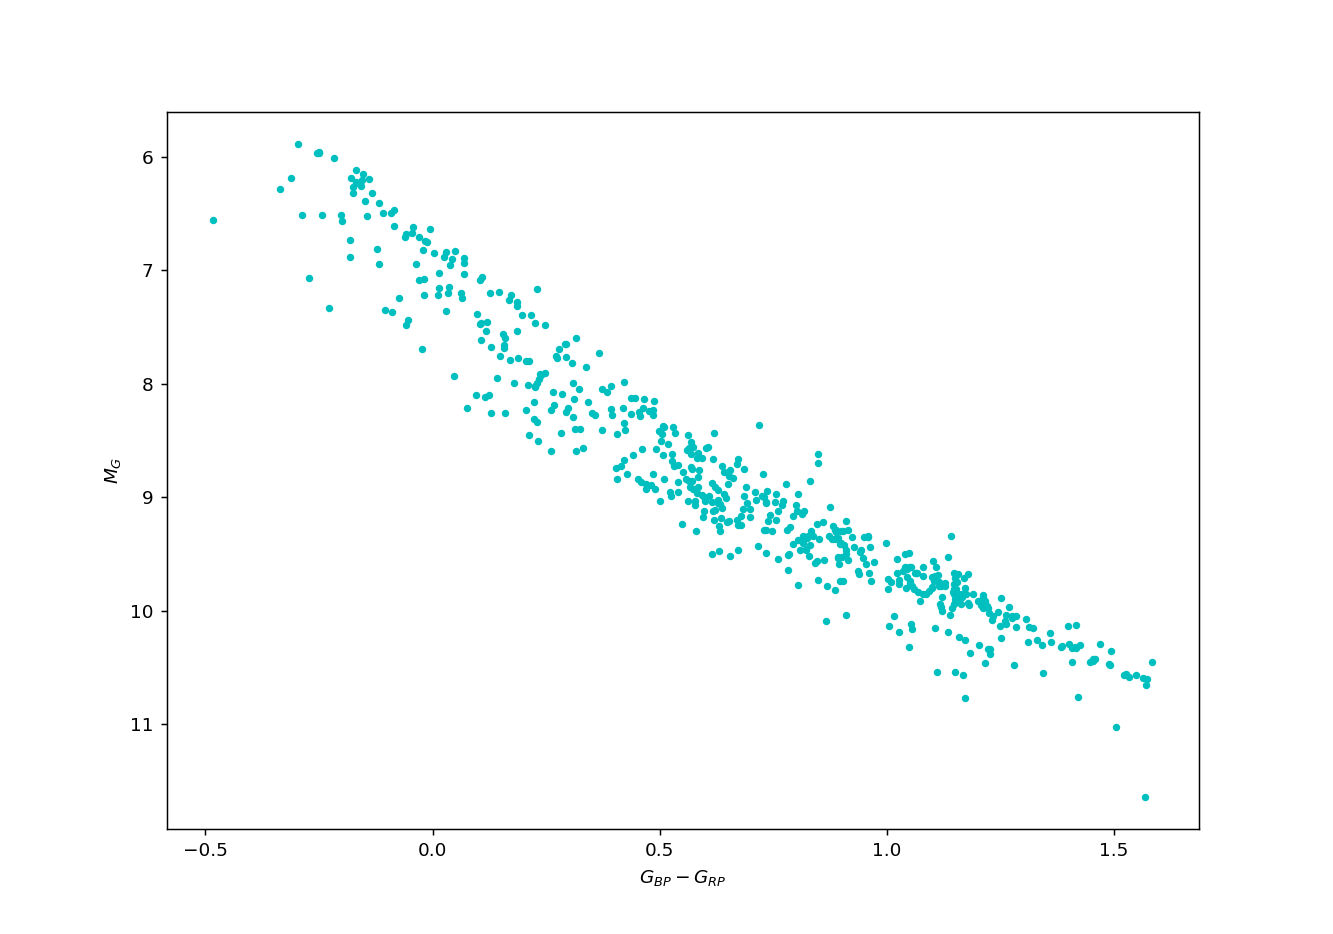

In [12]:
## plot of main sequence 
fig4 = plt.figure(4,figsize=(10,7))
ax4 = fig4.add_subplot(111)
ax4.plot(white_dwarfs_color,white_dwarfs_mag,'.',color ="c")
#ax.invert_xaxis()
ax4.invert_yaxis()
ax4.set_xlabel('$G_{BP} - G_{RP}$')
ax4.set_ylabel('$M_G$');

In [169]:
totalCount = white_dwarfs_color.size
print("The approx total count of white dwarfs is " + str(totalCount) + ".")

The approx total count of white dwarfs is 552.


In [65]:
!pwd

/Users/lchatur
